<a href="https://colab.research.google.com/github/JesusBandaG/FaceRecognitionDLModel/blob/main/Face_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition System**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing required libraries
import random, os, shutil
import imageio
import cv2
import numpy as np
import PIL
import os
from zipfile import ZipFile

## **Unzip the database**

In [ ]:
cont = 0
for i in range(20):
  cont = cont + 1
  if cont < 10 and cont != 5 and cont != 6:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face0{}.zip'.format(cont)
  elif cont >= 10:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face{}.zip'.format(cont)
  with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Terravic_Original') 

## **Renaming the database classes**

This operation is important to handle the names of the folders that contain the pictures of each person more easily, and it must be considered that the collections 5 and 6 are corrupted and it is not possible to access them.

In [ ]:
for i in range(1,21):
  if i >= 7 and i <= 9:
    os.rename('Terravic_Original/face0{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 10 and i <= 11:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 12:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face{}'.format(i - 2))

# **Creation of training, validation and testing datasets**

**We order randomly the database to avoid any bias**

In [ ]:
os.mkdir('Terravic_Shuffled')

In [ ]:
# Creating the directories
for i in range(18):
  if i < 9: #i = 0
    dest_train = 'Terravic_Shuffled/person0{}/'.format(i+1)
  elif i >= 9:
    dest_train = 'Terravic_Shuffled/person{}/'.format(i+1)
  os.mkdir(dest_train)


for index_class in range(18): #index_class = 0
  sample = 0
  index_class = index_class + 1 #index_class = 1
  if index_class < 10: 
    class_path = 'Terravic_Original/face0{}/'.format(index_class)
  elif index_class >= 10:
    class_path = 'Terravic_Original/face{}/'.format(index_class)

  lst = sorted(os.listdir(class_path))

  #Shuffling the dataset
  random.shuffle(lst)

  for file_name in lst:
    img_person = imageio.imread(class_path + file_name)
    if index_class < 10:
      if sample < 10:                                                       #0000.jpg
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

    else:
      if sample < 10:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

In [ ]:
# Verification
for i in range(18):
  i = i +1
  if i < 10:
    print('total  images in test_original/person0{}:'.format(i), len(os.listdir('Terravic_Shuffled/person0{}/'.format(i))))
  else:
    print('total  images in test_original/person{}:'.format(i), len(os.listdir('Terravic_Shuffled/person{}/'.format(i))))

total  images in test_original/person01: 227
total  images in test_original/person02: 620
total  images in test_original/person03: 592
total  images in test_original/person04: 487
total  images in test_original/person05: 1297
total  images in test_original/person06: 857
total  images in test_original/person07: 1117
total  images in test_original/person08: 283
total  images in test_original/person09: 434
total  images in test_original/person10: 2179
total  images in test_original/person11: 1417
total  images in test_original/person12: 1482
total  images in test_original/person13: 1125
total  images in test_original/person14: 1611
total  images in test_original/person15: 2632
total  images in test_original/person16: 2215
total  images in test_original/person17: 2539
total  images in test_original/person18: 1670


**Creating the datasets directories with their corresponding folders for each person in the database**

In [ ]:
datasets = ['train', 'validation', 'test']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(18):
    if i < 9:
      dest_train = dataset_name+'/person0{}/'.format(i+1)
    elif i >= 9:
      dest_train = dataset_name+'/person{}/'.format(i+1)
    os.mkdir(dest_train)

In [ ]:
def fill_dataset(src_dataset, dest_dataset, person_index, lower_limit, upper_limit):
  
  if person_index < 10:
    src_path = src_dataset+'/person0{}/'.format(person_index)
    dest_path = dest_dataset+'/person0{}/'.format(person_index)
  else:
    src_path = src_dataset+'/person{}/'.format(person_index)
    dest_path = dest_dataset+'/person{}/'.format(person_index)

  lst = sorted(os.listdir(src_path))
        
  for file_name in lst[lower_limit:upper_limit]:
    if lower_limit < upper_limit:
      img_original = imageio.imread(src_path + file_name)
      if lower_limit < 10:
          imageio.imwrite(dest_path + '000{}.jpg'.format(lower_limit), img_original)
      elif lower_limit >= 10 and lower_limit < 100:
          imageio.imwrite(dest_path + '00{}.jpg'.format(lower_limit), img_original)
      else: 
          imageio.imwrite(dest_path + '0{}.jpg'.format(lower_limit), img_original)
              
      lower_limit = lower_limit + 1

**Assigning images to each dataset**

In [ ]:
for i in range (1, 19):
  if i < 10:
    total = len(os.listdir('Terravic_Shuffled/person0{}'.format(i)))
  else:
    total = len(os.listdir('Terravic_Shuffled/person{}'.format(i)))
  limit1 = total - 127
  if limit1 % 2 == 0:
    limit_validation = int(limit1 / 2)
    limit_test = limit_validation
  else:
    limit_validation = limit1 // 2
    limit_test = (limit1 // 2) + 1

  fill_dataset('Terravic_Shuffled','train', i, 0, 127)
  print(limit_validation + 127)
  fill_dataset('Terravic_Shuffled','validation', i, 127, limit_validation + 127)
  fill_dataset('Terravic_Shuffled','test', i, limit_validation + 127, limit_validation + limit_test + 127)

177
373
359
307
712
492
622
205
280
1153
772
804
626
869
1379
1171
1333
898


In [ ]:
#  Verification 
import os
for i in range(18):
  i = i +1
  if i < 10:
    print('total  images in train/person0{}:'.format(i), len(os.listdir('train/person0{}/'.format(i))))
    print('total  images in validation/person0{}:'.format(i), len(os.listdir('validation/person0{}/'.format(i))))
    print('total  images in test/person0{}:'.format(i), len(os.listdir('test/person0{}/'.format(i))))
  else:
    print('total  images in train/person{}:'.format(i), len(os.listdir('train/person{}/'.format(i))))
    print('total  images in validation/person{}:'.format(i), len(os.listdir('validation/person{}/'.format(i))))
    print('total  images in test/person{}:'.format(i), len(os.listdir('test/person{}/'.format(i))))

total  images in train/person01: 127
total  images in validation/person01: 50
total  images in test/person01: 50
total  images in train/person02: 127
total  images in validation/person02: 246
total  images in test/person02: 247
total  images in train/person03: 127
total  images in validation/person03: 232
total  images in test/person03: 233
total  images in train/person04: 127
total  images in validation/person04: 180
total  images in test/person04: 180
total  images in train/person05: 127
total  images in validation/person05: 585
total  images in test/person05: 585
total  images in train/person06: 127
total  images in validation/person06: 365
total  images in test/person06: 365
total  images in train/person07: 127
total  images in validation/person07: 495
total  images in test/person07: 495
total  images in train/person08: 127
total  images in validation/person08: 78
total  images in test/person08: 78
total  images in train/person09: 127
total  images in validation/person09: 153
total

## **Model**

**We reference the training, validation and test datasets**

In [ ]:
train_dir = os.path.join('train')
validation_dir = os.path.join('validation')
test_dir = os.path.join('test')

**VGG16 architecture loading (Transfer Learning)**

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(72, 96, 3)) # input_shape

conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
______________________________________________________________

**Freezing some VGG16 layers**

In [ ]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 24, 128)       0     

## **Defining the neural network architecture (including the transfer learning module)**

In [ ]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization()) # Normaliza los pesos aprendidos hasta este punto
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 3, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 512)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 18)                9234      
Total params: 14,725,970
Trainable params: 7,089,682
Non-trainable params: 7,636,288
_________________________________________________________________


## **Compiling the model**

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']) #'acc' -> accuracy

## **Generators definition**

In [ ]:
#Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size= 9, 
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 2286 images belonging to 18 classes.
Found 10246 images belonging to 18 classes.


## **Training**

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch = 254, #70 debe corresponder al tamaño del lote 9*254 = 2286
      epochs= 30,
      validation_data=validation_generator,
      validation_steps=10246)

Epoch 1/30
254/254 [==============================] - 57s 226ms/step - loss: 0.1645 - acc: 0.9633 - val_loss: 0.0100 - val_acc: 0.9977
Epoch 2/30
254/254 [==============================] - 57s 226ms/step - loss: 0.0096 - acc: 0.9978 - val_loss: 0.0068 - val_acc: 0.9970
Epoch 3/30
254/254 [==============================] - 57s 224ms/step - loss: 6.3810e-04 - acc: 1.0000 - val_loss: 1.8085e-05 - val_acc: 1.0000
Epoch 4/30
254/254 [==============================] - 57s 224ms/step - loss: 1.4791e-04 - acc: 1.0000 - val_loss: 2.4523e-04 - val_acc: 1.0000
Epoch 5/30
254/254 [==============================] - 57s 224ms/step - loss: 1.2087e-04 - acc: 1.0000 - val_loss: 2.8230e-07 - val_acc: 1.0000
Epoch 6/30
254/254 [==============================] - 57s 223ms/step - loss: 1.3332e-05 - acc: 1.0000 - val_loss: 6.8331e-07 - val_acc: 1.0000
Epoch 7/30
254/254 [==============================] - 57s 224ms/step - loss: 5.8934e-06 - acc: 1.0000 - val_loss: 8.3990e-08 - val_acc: 1.0000
Epoch 8/30
254/

## **Accuracy and loss graphs**

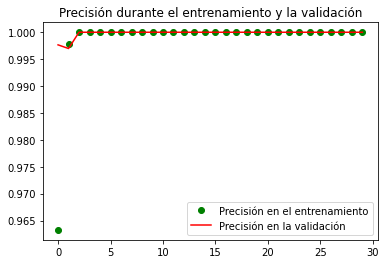

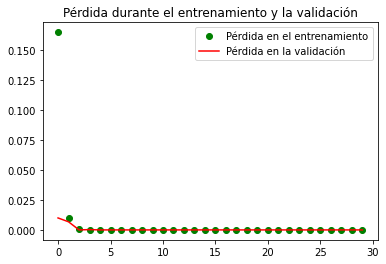

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()

plt.show()

## **Model retraining**

In [ ]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=254, #70
      epochs= 3)

Epoch 1/3
254/254 [==============================] - 5s 21ms/step - loss: 0.0546 - acc: 0.9895
Epoch 2/3
254/254 [==============================] - 5s 21ms/step - loss: 2.5889e-05 - acc: 1.0000
Epoch 3/3
254/254 [==============================] - 5s 21ms/step - loss: 5.9278e-06 - acc: 1.0000


In [ ]:
# Saving the model in Google Drive
model.save('/content/drive/My Drive/face_recognition_model1.h5')

In [ ]:
# Loading the saved model
from keras.models import load_model

model = load_model('/content/drive/My Drive/face_recognition_model1.h5')

## **Evaluating the model**

In [ ]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=900)
print('Recognition rate: ', test_acc)

Found 10252 images belonging to 18 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
Recognition rate:  1.0


## **Predictions**

In [ ]:
from PIL import Image #PILLOW

width = 96
height = 72
image_face = Image.open('train/person12/0029.jpg')
image_face = image_face.resize((width, height), Image.ANTIALIAS) # Image.ANTIALIAS reduce el ruido cuando reduces la imagen, Image.BICUBIC reduce el ruido cuando agrandas la imagen
image_face = np.array(image_face) # La imagen se convierte en un arreglo
image_face = image_face / 255.0 #-> #Tensor -> (72,96)

In [ ]:
image_face = np.expand_dims(image_face, axis = 0) #TENSOR -> (1, 72, 96)
image_face = np.expand_dims(image_face, axis = -1) #TENSOR -> (1, 72, 96, 1)
image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3) #TENSOR -> (1, 72, 96, 3) Unión de canales
print(image_face.shape)
prediction = model.predict(image_face)
print('La imagen pertenece a la persona', np.argmax(prediction)+1)

(1, 72, 96, 3)
La imagen pertenece a la persona 12


In [ ]:
prediction

array([[1.6245448e-11, 1.9399989e-11, 1.7529271e-11, 3.4576352e-12,
        9.1216357e-12, 2.9940141e-11, 3.0596923e-12, 7.6258791e-11,
        6.5624403e-12, 1.9939411e-11, 1.9755030e-10, 1.0000000e+00,
        1.4056047e-11, 4.4294932e-11, 1.7719612e-10, 3.8963222e-11,
        2.9519043e-12, 4.5703510e-12]], dtype=float32)